## Stage 01: Data Acquisition

In [2]:
# project path setup
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd().parent
SRC_PATH = PROJECT_ROOT / "src"

if str(SRC_PATH) not in sys.path:
    sys.path.insert(0, str(SRC_PATH))

In [4]:
from options_valuation.data.acquisition import get_price_data
from options_valuation.utils.columns import pick_price_col

import matplotlib.pyplot as plt

### Time Duration Setup
Set the start date two years from today

In [6]:
# imports
import pandas as pd
import datetime as dt
from options_valuation.config import load_env, get_key
load_env()

def two_years_ago(today: dt.date) -> dt.date:
    """Return the date ~2 years before today, safe for leap days."""
    try:
        return today.replace(year=today.year - 2)
    except ValueError:
        # Handles Feb 29 -> Feb 28
        return today.replace(month=2, day=28, year=today.year - 2)

today = dt.date.today()
start_date = two_years_ago(today)
end_date = today

print("Today:", today)
print("Start date (2Y):", start_date)
print("End date:", end_date)


Today: 2026-01-09
Start date (2Y): 2024-01-09
End date: 2026-01-09


### Stock Ticker Setup
Ask the user to enter a stock ticker, with a default of .env DEFAULT_TICKER or "DIS" (Disney). The program will validate the ticker using the yfinance library.

In [8]:
from options_valuation.data.validators import validate_ticker

default_ticker = get_key("DEFAULT_TICKER", default = "DIS")

while True:
    raw = input(f"Enter stock ticker (default {default_ticker}): ").strip()
    ticker = raw.upper() if raw else default_ticker

    if validate_ticker(ticker):
        break
    else:
        print(f"'{ticker}' is not a valid ticker. Try again.")

Enter stock ticker (default DIS):  DIS


### Data Retrieval
Fetch Alpha Vantage for stock data using the API key first, and then fall back to yfinance.

In [10]:
df, provider = get_price_data(ticker, start=start_date, end=end_date, prefer="alpha_vantage")
print("Provider used:", provider)
display(df.tail())

Provider used: yfinance


,date,open,high,low,close,adj_close,volume
497,2026-01-02,113.440002,113.440002,111.620003,111.849998,111.849998,8906200
498,2026-01-05,111.419998,116.029999,111.379997,114.070000,114.070000,12029000
499,2026-01-06,113.790001,114.760002,113.110001,114.570000,114.570000,7388300
500,2026-01-07,114.459999,114.970001,112.510002,112.910004,112.910004,8296300
501,2026-01-08,112.550003,114.989998,112.550003,114.169998,114.169998,9776800


### Data Storage
Store the stock data in data/raw/ folder

In [19]:
from options_valuation.data.files import save_raw_prices
out_path = save_raw_prices(df, ticker=ticker, provider=provider, frequency="daily")
print("Saved raw prices to:", out_path)

Saved raw prices to: /Users/allenpilipala/BSM_model/src/options_valuation/data/raw/DIS_yfinance_daily_2026-01-09.csv


## Historical Price Change Diagram
Draw a diagram showing the price change within the past two years

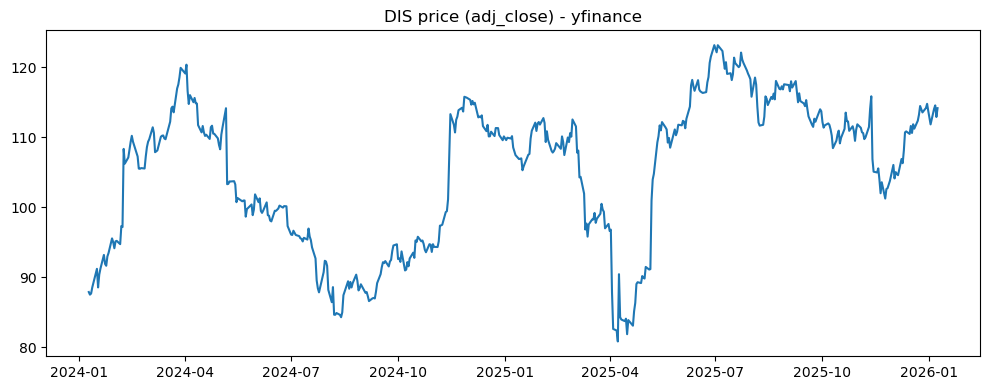

In [25]:
price_col = pick_price_col(df)
plt.figure(figsize=(10,4))
plt.plot(df["date"], df[price_col])
plt.title(f"{ticker} price ({price_col}) - {provider}")
plt.tight_layout()
plt.show()